gIn this notebook, I will automate the performance recording of the individual models.
This will also automate the graphs as well.

In [1]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import model.model_setup as ms
import model.temporary.testing_k_folds as tk
from model.multi_models import ModelWrapper, get_model_wrapper_list

random_state = 1
test_size = 0.3

student_data = ms.get_student_data('../../data/data.csv', bin=False)
features = ["A8", "Has_504", "Student on Free or Reduced Lunch", "IEP/Specialized"]

models = [RandomForestClassifier(random_state=1),
          AdaBoostClassifier(random_state=1),
          LogisticRegression()]

model_wrapper_list = get_model_wrapper_list(models,
                                            student_data[features],
                                            student_data['ChronicallyAbsent_in_HS'],
                                            random_state=random_state,
                                            test_size=test_size)

for i in model_wrapper_list:
    i.fit()

Number of students on reduced lunch: 23
4 outliers were removed
<class 'pandas.core.frame.DataFrame'>
Scoring used:  recall
Best parameters:  {}
Best/Mean score using best parameters:  0.5666666666666667
<class 'pandas.core.frame.DataFrame'>
Scoring used:  recall
Best parameters:  {}
Best/Mean score using best parameters:  0.5
<class 'pandas.core.frame.DataFrame'>
Scoring used:  recall
Best parameters:  {}
Best/Mean score using best parameters:  0.6333333333333333



AUC of RandomForestClassifier: 0.762

AUC of AdaBoostClassifier: 0.766

AUC of LogisticRegression: 0.782
[[13  1]
 [ 7  2]]
0.6521739130434783
[[13  1]
 [ 3  6]]
0.8260869565217391
[[12  2]
 [ 6  3]]
0.6521739130434783


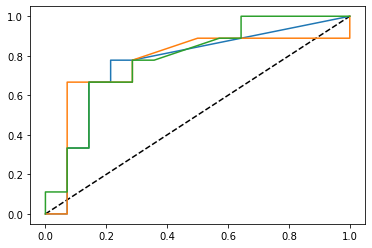

In [3]:
import matplotlib.pyplot as plt

plt.plot([0,1], [0,1], 'k--')

for model in model_wrapper_list:
    plt.plot(*model.get_roc_curve())

for i in model_wrapper_list:
    print(i.results["matrix"])
    print(i.results["accuracy"])

    """

    TEST SIZE: 0.3
    RANDOM STATE=1
    AUC of RandomForestClassifier: 0.857

AUC of AdaBoostClassifier: 0.871

AUC of LogisticRegression: 0.850
[[12  2]
 [ 2  8]]
0.8333333333333334
[[12  2]
 [ 4  6]]
0.75
[[12  2]
 [ 4  6]]
0.75
"""